## Hopfield Network - Longren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## Tasks:

In [2]:
# 1. Store the patterns in the Hopfield network

'pattern A'
SA = [1,-1,1,-1]

'pattern B'
SB = [-1,1,1,1]

'pattern C'
SC = [-1,-1,-1,1]

N = 3 #number of patterns
K = 4 #number of units

WA = np.zeros([K,K]) #empty weight matrix
WB = np.zeros([K,K])
WC = np.zeros([K,K])

def weight_int(W,S): #weight initialization
    
    for i in range(K): #for each row
        
        for j in range(K): #for each column
            
            W[i][j] = S[i] * S[j] #calculate weights for i != j
            W[j][j] = 0 #set weights i = j to zero
            
    return W


WA = weight_int(WA,SA)
print('weights for pattern A:')
print(WA)
WB = weight_int(WB,SB)
print('weights for pattern B:')
print(WB)
WC = weight_int(WC,SC)
print('weights for pattern C:')
print(WC)


weights for pattern A:
[[ 0. -1.  1. -1.]
 [-1.  0. -1.  1.]
 [ 1. -1.  0. -1.]
 [-1.  1. -1.  0.]]
weights for pattern B:
[[ 0. -1. -1. -1.]
 [-1.  0.  1.  1.]
 [-1.  1.  0.  1.]
 [-1.  1.  1.  0.]]
weights for pattern C:
[[ 0.  1.  1. -1.]
 [ 1.  0.  1. -1.]
 [ 1.  1.  0. -1.]
 [-1. -1. -1.  0.]]


In [3]:
# 1. Which of the patterns are stable states of the network dynamics?

Z = np.zeros([K]) #empty input array

def unit_input(W,S): #apply stored pattern as input
        
    i = np.random.randint(0,4) #asynchronous update of units -- is this what is meant for choosing i?
    
    for j in range(K):

        Z[i] = np.sum(W[i][j] * S[j]) #new state Z
           
        #print(j,i,Z[i])
            
        if Z[i] >= 0:
                
            Z[i] = 1
            
        elif Z[i] < 0:
                
            Z[i] = -1  
            
    return Z


#let's run the patterns again and see where they converges to

count = 50

def converge(W,S):
    
    print('original pattern:', S)
    
    for i in range(count):
    
        Zi = unit_input(W,S)
    
    return Zi

ZA = converge(WA,SA)
print('convergence of A:',ZA)
ZB = converge(WB,SB)
print('convergence of B:',ZB)
ZC = converge(WC,SC)
print('convergence of C:',ZC)


original pattern: [1, -1, 1, -1]
convergence of A: [ 1. -1.  1.  1.]
original pattern: [-1, 1, 1, 1]
convergence of B: [-1.  1.  1.  1.]
original pattern: [-1, -1, -1, 1]
convergence of C: [-1. -1. -1.  1.]


Analyzing the results of my code for the convergence of the patterns, we can see that according to mine there are two stable patterns, B & C, as they stick to the same pattern that was initially given after count=50 iterations. The other pattern, A, is not stable as it does not have the same value for S4 as was initially given.
However I believe my result for A is incorrect, as from the analytical MNS course we learned that there are three possible states for the Hopfield Network: P, -P, and (1,1,...,1) for the convergence of the pattern. And only a change of sign on S4 does not match a possible pattern that the unstable state could converge to.

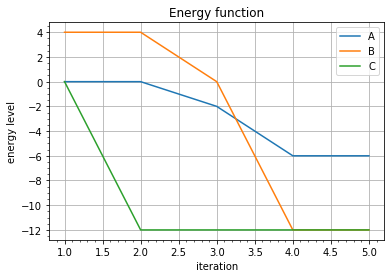

In [11]:
# 2. Calculate the energy function for the network

#loop through iterations

W = np.zeros([K,K])
Z = np.zeros([K])
E = np.zeros([K,K])

count = 5

def energy(W,S): #energy function
    
    for i in range(K):
        
        for j in range(K):
            
            E[i][j] = -1 * np.sum(W[i][j] * np.dot(Z[i],Z[j]))
            
    return E

ELA = np.empty(count) 
ELB = np.empty(count) 
ELC = np.empty(count) 
    
def energy_loop(EL,W,S):
    
    W = weight_int(W,S)
    
    for i in range(count):
        
        Z = unit_input(W,S)
        
        energy(W,S)
        
        EL[i] = np.sum(E)

    return EL

energy_loop(ELA,WA,SA)
energy_loop(ELB,WB,SB)
energy_loop(ELC,WC,SC)
#print(ELA)
#print(ELB)
#print(ELC)

x = np.linspace(1,count,count)
plt.plot(x,ELA)
plt.plot(x,ELB)
plt.plot(x,ELC)
plt.minorticks_on()
plt.grid()
plt.xlabel('iteration')
plt.ylabel('energy level')
plt.title('Energy function')
plt.legend(('A','B','C'))
plt.show()

All three patterns should only have a decreasing energy, however pattern A is having troubles for me for some iterations.

In [5]:
# 3. Reuse the code to store and recall image patterns

# 3.1 load the given images
images = np.load(r"C:\Users\lcube\Desktop\jupyter\BCCN\MNS\given\images.npz")

im = []
lst = images.files
for item in lst: #getting the file into a usable form (somehow)
    
    im.append(images[item]) #i know append isn't recommended, but it took me forever to find a way to processs the .npz
    
im = np.array(im) #array of size 8 x 30 x 40
#print(im[0][7][29][39])

# 3.2 store the patterns into a weight matrix

### i don't understand, why are we flattening it? shouldn't it work fine as the weights are 2 dimensional
### or do we want to get it to an 8 x 1200 and go from there..

im = [im[0][i].flatten() for i in range(7)] #flatten from 2 dimensions into vectors
im = np.array(im)
#print(im)
#print(np.size(im[0]))

### i know that it is recommended to be using matrix multiplication in order to calculate most things,
### but i am not sure how to do that without iterating over i and j to pick out the value that is 
### being updated 

w = np.ones([8,1200])
#print(w)

for i in range(8): #calculate the weight matrix with the patterns 
    
    for j in range(1200):
        
        w[i][j] = im[0][i] * im[0][j] #calculate weights for i != j
        w[i][i] = 0 #set weights i = j to zero

print(w) #the weight matrix W = {w_ij}


### i'm not sure how to use the input matrices of the image file in order to calculate what it is we want



[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
